In [ ]:
!pip install tweepy textblob vaderSentiment matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00


In [1]:
import tweepy
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [7]:
def authenticate_twitter_v2():
    BEARER_TOKEN = 'Your_Secret_Key'
    client = tweepy.Client(bearer_token=BEARER_TOKEN)
    return client

In [8]:
def fetch_tweets_v2(client, query, count=50):
    tweets = []
    for tweet in tweepy.Paginator(client.search_recent_tweets,
                                 query=query,
                                 tweet_fields=['text', 'lang'],
                                 max_results=100).flatten(limit=count):
        if tweet.lang == 'en':
            tweets.append(tweet.text)
    return tweets

In [9]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [10]:
def visualize_results(df, query):
    sentiment_counts = df['Sentiment'].value_counts()
    colors = ['green' if x == 'Positive' else 'red' if x == 'Negative' else 'blue' for x in sentiment_counts.index]
    sentiment_counts.plot(kind='bar', color=colors)
    plt.title(f'Sentiment Analysis for "{query}"')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')
    plt.show()


In [11]:
def display_examples(df):

    for sentiment in ['Positive', 'Negative', 'Neutral']:
        print(f"\nExample {sentiment} Tweets:")
        print(df[df['Sentiment'] == sentiment]['Tweet'].head(3).to_string(index=False))

Fetching 50 tweets for query: war


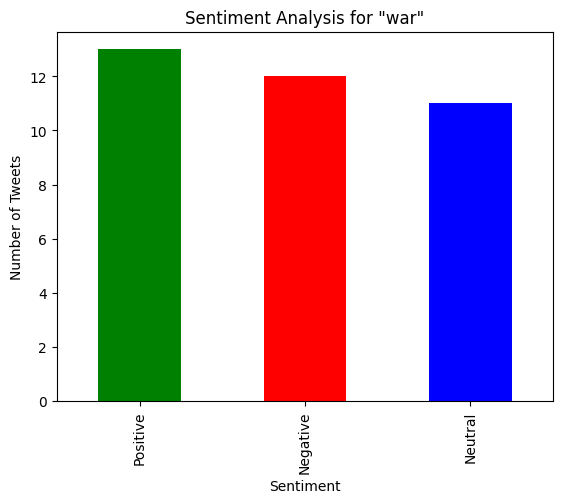


Example Positive Tweets:
RT @khaliphaXhood: Created a group called Crypt...
RT @DalrympleWill: Everyone must watch this rem...
@shivangitwt Do tell us if u like it...I've wan...

Example Negative Tweets:
@CalumB60835284 I think even the most hawkish K...
@CNNEE .@CNNEE Disappointed with Trump ❗❗❗🤬\nht...
RT @NickOnRipple: I'm seething. I'm 35 and I've...

Example Neutral Tweets:
RT @ShaykhSulaiman: “ALL ISRAELI SOLDIERS ARE W...
RT @gbponz: Velina, Europe is not a power. It's...
RT @ricwe123: We are constantly told how the wa...

Sentiment analysis complete!
Total Tweets Analyzed: 36
Results saved to 'tweet_sentiment_results.csv'.


In [12]:
def main():
    client = authenticate_twitter_v2()
    query = 'war'
    count = 50
    print(f"Fetching {count} tweets for query: {query}")
    tweets = fetch_tweets_v2(client, query, count)
    df = pd.DataFrame(tweets, columns=['Tweet'])
    df['Sentiment'] = df['Tweet'].apply(analyze_sentiment)
    visualize_results(df, query)
    display_examples(df)
    df.to_csv('tweet_sentiment_results.csv', index=False)
    print("\nSentiment analysis complete!")
    print(f"Total Tweets Analyzed: {len(df)}")
    print("Results saved to 'tweet_sentiment_results.csv'.")

if __name__ == "__main__":
    main()